# Import Relevant Data

In [ ]:
import pandas as pd
import ast
import numpy as np
import math
import time
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [ ]:
df_cryp=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/2017to2022_rarity_gas_usd_price.csv')
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
1,1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.499040e+09,1499040000,1.180929e+08,1499040000,276.41
2,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
3,3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.553040e+09,1553040000,5.115253e+07,1553040000,140.22
4,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97
17822,17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97
17823,17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,...,#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913,1.658102e+09,1658102400,1.475703e+08,1658102400,1583.55
17824,17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000,1.658362e+09,1658361600,1.027865e+08,1658361600,1575.68


# Volume of Active Market Wallet & Daily Change Rate

In [ ]:
df_group=df_cryp.groupby('date_x').count()
active_wallet=np.array(df_group['Unnamed: 0'])*2
df_wallet=DataFrame({"active_wallet": active_wallet,
                     "date":df_group.index})
df_wallet

,active_wallet,date
0,34,2017-06-23
1,34,2017-06-24
2,24,2017-06-25
3,10,2017-06-26
4,46,2017-06-27
...,...,...
1364,4,2022-07-22
1365,4,2022-07-23
1366,12,2022-07-25
1367,6,2022-07-26


In [ ]:
df_wallet['active_wallet_shift']=df_wallet['active_wallet'].shift(1)
df_wallet['active_wallet_shift'][0]=3
df_wallet

<ipython-input-6-51ec93477ae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wallet['active_wallet_shift'][0]=3


,active_wallet,date,active_wallet_shift
0,34,2017-06-23,3.0
1,34,2017-06-24,34.0
2,24,2017-06-25,34.0
3,10,2017-06-26,24.0
4,46,2017-06-27,10.0
...,...,...,...
1364,4,2022-07-22,4.0
1365,4,2022-07-23,4.0
1366,12,2022-07-25,4.0
1367,6,2022-07-26,12.0


In [ ]:
wallet_change=(np.array(df_wallet['active_wallet'])-np.array(df_wallet['active_wallet_shift']))/np.array(df_wallet['active_wallet_shift'])
df_wallet['wallet_change']=wallet_change
df_wallet['wallet_change']

0       10.333333
1        0.000000
2       -0.294118
3       -0.583333
4        3.600000
          ...    
1364     0.000000
1365     0.000000
1366     2.000000
1367    -0.500000
1368    -0.333333
Name: wallet_change, Length: 1369, dtype: float64

In [ ]:
df_cryp=df_cryp.merge(df_wallet, left_on='date_x', right_on='date')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [ ]:
df_cryp.to_csv('wallet_rarity_usd_gas_merged.csv')
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date_x,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,28.734107,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,484.728383,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,0.000000,1.644970e+09,1644969600,3.597364e+08,1644969600,3124.33,2,2022-02-16,4.0,-0.500000
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,0.000000,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,169.953199,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,16.679182,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000


# Volume of Cryptopunks Sales Daily Change Rate

In [ ]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date_x,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,28.734107,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,484.728383,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,0.000000,1.644970e+09,1644969600,3.597364e+08,1644969600,3124.33,2,2022-02-16,4.0,-0.500000
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,0.000000,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,169.953199,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,16.679182,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000


In [ ]:
sales=df_cryp.groupby('timestamp')['eth_price'].sum()
sales

timestamp
1.498176e+09      2.084000
1.498262e+09      3.576000
1.498349e+09      1.746740
1.498435e+09      0.820001
1.498522e+09      6.443038
                   ...    
1.658448e+09    177.000000
1.658534e+09    198.000000
1.658707e+09    410.400000
1.658794e+09    257.900000
1.658880e+09    174.640000
Name: eth_price, Length: 1369, dtype: float64

In [ ]:
df_sales=DataFrame({'daily_sales':sales,
                    'date_z':df_group.index})
df_sales

,daily_sales,date_z
timestamp,,
1.498176e+09,2.084000,2017-06-23
1.498262e+09,3.576000,2017-06-24
1.498349e+09,1.746740,2017-06-25
1.498435e+09,0.820001,2017-06-26
1.498522e+09,6.443038,2017-06-27
...,...,...
1.658448e+09,177.000000,2022-07-22
1.658534e+09,198.000000,2022-07-23
1.658707e+09,410.400000,2022-07-25


In [ ]:
df_sales['sales_shift']=df_sales['daily_sales'].shift(1)
df_sales['sales_shift'][0]=0.42
change_sales=(np.array(df_sales['daily_sales'])-np.array(df_sales['sales_shift']))/np.array(df_sales['sales_shift'])
change_sales

<ipython-input-13-c0bd02db3cfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['sales_shift'][0]=0.42
<ipython-input-13-c0bd02db3cfe>:3: RuntimeWarning: divide by zero encountered in true_divide
  change_sales=(np.array(df_sales['daily_sales'])-np.array(df_sales['sales_shift']))/np.array(df_sales['sales_shift'])


array([ 3.96190476,  0.7159309 , -0.51153798, ...,  1.07272727,
       -0.37158869, -0.32283831])

In [ ]:
df_sales['daily_sales_change']=change_sales
df_sales

,daily_sales,date_z,sales_shift,daily_sales_change
timestamp,,,,
1.498176e+09,2.084000,2017-06-23,0.420000,3.961905
1.498262e+09,3.576000,2017-06-24,2.084000,0.715931
1.498349e+09,1.746740,2017-06-25,3.576000,-0.511538
1.498435e+09,0.820001,2017-06-26,1.746740,-0.530554
1.498522e+09,6.443038,2017-06-27,0.820001,6.857354
...,...,...,...,...
1.658448e+09,177.000000,2022-07-22,168.680000,0.049324
1.658534e+09,198.000000,2022-07-23,177.000000,0.118644
1.658707e+09,410.400000,2022-07-25,198.000000,1.072727


In [ ]:
df_cryp=df_cryp.merge(df_sales,left_on='timestamp',right_on='timestamp')

In [ ]:
df_cryp.to_csv('sales_wallet_rarity_gas_usd.csv')

In [ ]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_x,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,1644969600,3124.33,2,2022-02-16,4.0,-0.500000,76.480,2022-02-16,185.00,-0.586595
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,1653004800,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,1653004800,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,1653004800,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779


# Cryptopunk Price(USD)

In [ ]:
df_cryp['Price']=np.array(df_cryp['eth_price'])*np.array(df_cryp['eth_usd_price'])
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change,Price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,9.8055
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,13.0740
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,81.7125
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,98.0550
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,65.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,3124.33,2,2022-02-16,4.0,-0.500000,76.480,2022-02-16,185.00,-0.586595,238948.7584
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779,106728.2352
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779,99409.5040
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779,100798.8888


# ROI

## roi1

In [ ]:
number = df_cryp.groupby(['punk_id']).count()
max(number['type'])

15

In [ ]:
roi = df_cryp.groupby(['punk_id']).agg({'Price':['min','max']})
#roi.rename(columns={'data1':'data1_min'},inplace=True)#修改列名
roi=roi['Price']
roi

,min,max
punk_id,,
1,5154.680000,5154.6800
14,184.869000,351.4445
53,27491.400000,431919.0729
89,7050.273100,7050.2731
116,228.660000,455.9280
...,...,...
9980,81238.588800,87978.3125
9982,405112.050000,483770.2200
9990,0.029138,225753.3030


In [ ]:
roi['ROI'] = (roi['max']-roi['min'])/roi['min']
roi

,min,max,ROI
punk_id,,,
1,5154.680000,5154.6800,0.000000e+00
14,184.869000,351.4445,9.010461e-01
53,27491.400000,431919.0729,1.471106e+01
89,7050.273100,7050.2731,0.000000e+00
116,228.660000,455.9280,9.939124e-01
...,...,...,...
9980,81238.588800,87978.3125,8.296210e-02
9982,405112.050000,483770.2200,1.941640e-01
9990,0.029138,225753.3030,7.747765e+06


## roi2

In [ ]:
roi2 = df_cryp.groupby(['punk_id'])['timestamp','punk_id','Price']
roi2.get_group(197)

<ipython-input-22-5cb3efb4e904>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  roi2 = df_cryp.groupby(['punk_id'])['timestamp','punk_id','Price']


,timestamp,punk_id,Price
13355,1.638490e+09,197,295352.40
14663,1.642810e+09,197,0.00
14664,1.642810e+09,197,0.00
16989,1.640822e+09,197,241155.20
16990,1.640822e+09,197,237445.12


In [ ]:
df_cryp.loc[1,'timestamp']

1498176000.0

In [ ]:
list_roi=[]
rq=[] #date
for i in roi.index:
  if len(list(roi2.get_group(i).index)) >1:
    for j in range(len(list(roi2.get_group(i).index)[0:-1])):
     
      a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]
      list_roi.append(a) 
      b=df_cryp.loc[j,'timestamp']
      rq.append(b)

list_roi

<ipython-input-24-3b6c0ea0f800>:7: RuntimeWarning: invalid value encountered in double_scalars
  a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]
<ipython-input-24-3b6c0ea0f800>:7: RuntimeWarning: divide by zero encountered in double_scalars
  a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]


[0.9010461461900049,
 -0.33410538506079906,
 -0.9002953499810589,
 -0.3616203104471125,
 0.9939123589609027,
 -0.4417953705257222,
 0.409778817877617,
 0.1509435450770052,
 -0.278263509197501,
 -0.7797594239440201,
 0.051724137931034565,
 1.2130125143433523,
 -0.8414363874115988,
 2.2078815697570615,
 0.23504740717979586,
 0.11172152562352182,
 0.06848806537690662,
 0.9913981767762089,
 3.1285014685271895,
 0.1619480519480519,
 -0.9891386745475321,
 61.356053684110044,
 -0.7622769110500511,
 -1.0,
 nan,
 inf,
 -0.015384615384615333,
 -0.8718474121026576,
 4.817752767106841,
 0.24801195966636563,
 -0.5156300736926689,
 8.10395827900695,
 0.07389501034126165,
 -0.11798531744190302,
 -0.2525004622255092,
 -0.5629450414187605,
 -0.17668849921998708,
 -0.44244454597170213,
 1.3559043434693798,
 -0.8371237423511491,
 -0.01299654251355293,
 -0.3114094250082772,
 -0.27038834621572183,
 -0.6674702276154103,
 -0.6333837731868514,
 0.5094821251463525,
 8.355159040136009,
 0.0,
 -0.738143525702194

In [ ]:
ROI=DataFrame({'Time':rq,
               'ROI':list_roi})
ROI

,Time,ROI
0,1.498176e+09,0.901046
1,1.498176e+09,-0.334105
2,1.498176e+09,-0.900295
3,1.498176e+09,-0.361620
4,1.498176e+09,0.993912
...,...,...
11546,1.498176e+09,-0.162594
11547,1.498176e+09,-0.804058
11548,1.498176e+09,-0.999999
11549,1.498176e+09,4.846569


In [ ]:
df_cryp=df_cryp.merge(ROI,left_on='timestamp',right_on='Time')

In [ ]:
df_cryp=df_cryp[df_cryp['ROI']<100000]

In [ ]:
df_cryp.to_csv('roi_sales_wallet_rarity_gas_usd.csv')

# Explaination

In [ ]:
#df_cryp=pd.read_csv('https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/hedonic_data/roi_sales_wallet_rarity_gas_usd.csv')
df_cryp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date_x', 'from', 'to', 'eth_price',
       'punk_id', 'type', 'gender', 'skin_tone', 'attr_count', 'attributes',
       'skin_tone_color', 'img_url', 'Rarity_Score_1_rarest',
       'Rarity_Score_2_Average', 'Rarity_Score_3_multiple', 'timestamp',
       'date_y', 'gas_eth_price', 'date_x', 'eth_usd_price', 'active_wallet',
       'date_y', 'active_wallet_shift', 'wallet_change', 'daily_sales',
       'date_z', 'sales_shift', 'daily_sales_change', 'Price', 'Time', 'ROI'],
      dtype='object')

## Correlation

In [ ]:
# Visualisations
"""将数据进行可视化"""
#print(train.head(3))
# correlation heatmap   相关性热点矩阵
 
#plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features',y=1.05,size=15)
#sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
            #square=True,linecolor='white',annot=True)
#plt.show()

'将数据进行可视化'

# Stationay Test

## Augmented Dickey Fuller test (ADF Test)：

零假设为序列有单位根，是非稳的，P-Value如果小于显著级别(0.05)，则可以拒绝零假设。

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
df = df_cryp

# ADF Test
result = adfuller(df.Price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.5904877882204804
p-value: 0.09497922858041163
Critial Values:
   1%, -3.4303846863826726
Critial Values:
   5%, -2.861555330917043
Critial Values:
   10%, -2.566778160096853


In [ ]:
# ADF Test
df = df_cryp
result = adfuller(df.ROI.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -49.08805640829745
p-value: 0.0
Critial Values:
   1%, -3.4303847011078683
Critial Values:
   5%, -2.8615553374253446
Critial Values:
   10%, -2.5667781635609948


## Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)：

与ADF正好相反，零假设为序列是*稳的。另外，在python中，可以通过指定regression='ct'参数来让kps把“确定性趋势(deterministic trend)”的序列认为是*稳的。

In [ ]:
# KPSS Test
result = kpss(df.Price.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 37.949595
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
# KPSS Test
result = kpss(df.ROI.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.007925
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Hedonic Regression

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change,Price,Time,ROI
0,0,0,2017-06-23,1406,1218,0.030,6548,Human,Male,Albino,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,9.80550,1.498176e+09,0.901046
130913,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,19.61100,1.498176e+09,4571.089144
130914,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,19.61100,1.498176e+09,-0.577873
130915,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,19.61100,1.498176e+09,2.234284
130916,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,19.61100,1.498176e+09,-0.037272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65472,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,34.97295,1.498176e+09,-0.998658
65473,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,34.97295,1.498176e+09,1383.472758
65474,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,34.97295,1.498176e+09,-0.999584
65463,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,34.97295,1.498176e+09,-0.030869


In [ ]:
#Since the price of Cryptopunks' price is not stationary, we will transform the price into log price
df_cryp['Log_price']=np.log(np.array(df_cryp['Price']))

In [ ]:
gender_col=df_cryp['gender']
skin_col=df_cryp['skin_tone']

In [ ]:
#conver categorical variable into factor

#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,sales_shift,daily_sales_change,Price,Time,ROI,Log_price,Male,Dark,Light,Medium
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,0.42,3.961905,9.8055,1.498176e+09,0.901046,2.282943,1,0,0,0
130913,22,22,2017-06-23,1406,1218,0.06,5624,Human,Male,Light,...,0.42,3.961905,19.6110,1.498176e+09,4571.089144,2.976091,1,0,1,0
130914,22,22,2017-06-23,1406,1218,0.06,5624,Human,Male,Light,...,0.42,3.961905,19.6110,1.498176e+09,-0.577873,2.976091,1,0,1,0
130915,22,22,2017-06-23,1406,1218,0.06,5624,Human,Male,Light,...,0.42,3.961905,19.6110,1.498176e+09,2.234284,2.976091,1,0,1,0
130916,22,22,2017-06-23,1406,1218,0.06,5624,Human,Male,Light,...,0.42,3.961905,19.6110,1.498176e+09,-0.037272,2.976091,1,0,1,0


In [ ]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,sales_shift,daily_sales_change,Price,Time,ROI,Log_price,Male,Dark,Light,Medium
0,0,0,2017-06-23,1406,1218,0.030,6548,Human,Male,Albino,...,0.42,3.961905,9.80550,1.498176e+09,0.901046,2.282943,1,0,0,0
130913,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,0.42,3.961905,19.61100,1.498176e+09,4571.089144,2.976091,1,0,1,0
130914,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,0.42,3.961905,19.61100,1.498176e+09,-0.577873,2.976091,1,0,1,0
130915,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,0.42,3.961905,19.61100,1.498176e+09,2.234284,2.976091,1,0,1,0
130916,22,22,2017-06-23,1406,1218,0.060,5624,Human,Male,Light,...,0.42,3.961905,19.61100,1.498176e+09,-0.037272,2.976091,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65472,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,0.42,3.961905,34.97295,1.498176e+09,-0.998658,3.554575,1,0,1,0
65473,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,0.42,3.961905,34.97295,1.498176e+09,1383.472758,3.554575,1,0,1,0
65474,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,0.42,3.961905,34.97295,1.498176e+09,-0.999584,3.554575,1,0,1,0
65463,10,10,2017-06-23,1406,888,0.107,6318,Human,Male,Light,...,0.42,3.961905,34.97295,1.498176e+09,-0.030869,3.554575,1,0,1,0


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)   
 
train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [    0     1     2 ... 62841 62842 62843] TEST: [ 62844  62845  62846 ... 125684 125685 125686]
TRAIN: [     0      1      2 ... 125684 125685 125686] TEST: [125687 125688 125689 ... 188527 188528 188529]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,sales_shift,daily_sales_change,Price,Time,ROI,Log_price,Male,Dark,Light,Medium
125687,20,20,2017-06-23,1406,1218,0.06,4025,Human,Male,Dark,...,0.42,3.961905,19.611,1.498176e+09,1.749152,2.976091,1,1,0,0
125688,20,20,2017-06-23,1406,1218,0.06,4025,Human,Male,Dark,...,0.42,3.961905,19.611,1.498176e+09,-0.998547,2.976091,1,1,0,0
125689,20,20,2017-06-23,1406,1218,0.06,4025,Human,Male,Dark,...,0.42,3.961905,19.611,1.498176e+09,600.184871,2.976091,1,1,0,0
125690,20,20,2017-06-23,1406,1218,0.06,4025,Human,Male,Dark,...,0.42,3.961905,19.611,1.498176e+09,-0.080071,2.976091,1,1,0,0
125691,20,20,2017-06-23,1406,1218,0.06,4025,Human,Male,Dark,...,0.42,3.961905,19.611,1.498176e+09,0.019040,2.976091,1,1,0,0


In [ ]:
cols_R = ['Log_price','Dark','Light','Medium','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
cols_R

['Log_price',
 'Dark',
 'Light',
 'Medium',
 'Male',
 'skin_tone',
 'wallet_change',
 'daily_sales_change',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price']

In [ ]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,Dark,Light,Medium,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
125687,2.976091,1,0,0,1,Dark,10.333333,3.961905,111.683609,1.720330e+08,326.85
125688,2.976091,1,0,0,1,Dark,10.333333,3.961905,111.683609,1.720330e+08,326.85
125689,2.976091,1,0,0,1,Dark,10.333333,3.961905,111.683609,1.720330e+08,326.85
125690,2.976091,1,0,0,1,Dark,10.333333,3.961905,111.683609,1.720330e+08,326.85
125691,2.976091,1,0,0,1,Dark,10.333333,3.961905,111.683609,1.720330e+08,326.85


In [ ]:
X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [ ]:
X_train['Dark'].nunique()

2

In [ ]:
def mul_lr():   
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
mul_lr()

X_train.shape=(120672, 9)
 y_train.shape =(120672, 1)
 X_test.shape=(60325, 9)
,  y_test.shape=(60325, 1)
LinearRegression()
[-4.19380602]
[[ 1.16822468e+00  1.08270878e+00  4.43525721e-01  2.96395306e-01
   0.00000000e+00 -6.61744490e-24 -3.78675013e-04  4.02364536e-08
   7.67449448e-14]]


RMSE by hand: [1.26762111]


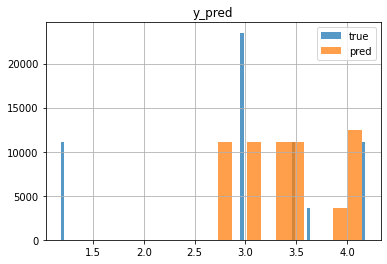

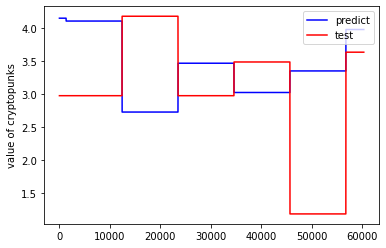

In [ ]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=1)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [ ]:
y = np.array(df_cryp['Log_price']) 
X = np.array(df_cryp[['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                 1.432e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:41:13   Log-Likelihood:            -2.1779e+05
No. Observations:              188530   AIC:                         4.356e+05
Df Residuals:                  188524   BIC:                         4.357e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6550      0.006    114.529      0.0

# Sentiment Regression